# Premier League Club Investment Analysis for Company ABC (EDA) 

**Context:**
    
Company ABC have invested in top-tier sports teams. The dataset in their possession comprises crucial information about all the teams that have participated in premier league (assume that it is the data for all teams). It includes data on the number of goals scored, the number of times they have finished in the top two positions and other relevant details.

**Data:**
Premier League Final Data.csv- : The data set contains information on all the teams so far participated in all the premier league tournaments.

**Data Dictionary:**

* Club: Name of the football club
* Matches: Number of matches the club has played in the Premier League
* Wins: Number of matches won by the club in the Premier League
* Loss: Number of matches lost by the club in the Premier League
* Draws: Number of matches drawn by the club in the Premier League
* Clean Sheets: Number of matches in which the club has prevented the opposing side from scoring
* Team Launch: Year in which the club was founded
* Winners: Number of times the club has won the Premier League
* Runners-up: Number of times the club has finished as runners-up in the Premier League

**Project Objective**

The management of Company ABC aims to invest in some of the top-performing clubs in the English Premier League. To aid in their decision-making process, the analytics department has been tasked with creating a comprehensive report on the performance of various clubs. However, some of the more established clubs have already been owned by the competitors. As a result, Company ABC wishes to identify the clubs they can approach and potentially invest to ensure a successful and profitable deal.

*Note*

*- Unauthorised use or distribution of this project prohibited @dataanalystduo*

*- Dataset has been downloaded from the internet using multiple sources. All the credit for the dataset goes to the original creator of the data*

**Key learning after this project:**

- Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset.
- Observation writing involves examining the data and noting any notable findings, anomalies, or areas of interest.
- Exploratory Data Analysis (EDA) is the process of examining and visualizing a dataset to understand its main characteristics, such as the distribution of data, the relationships between variables, and any anomalies or patterns that may exist. The goal of EDA is to uncover insights and trends that can help inform further analysis or decision-making. It is often the first step in any data analysis project, as it provides a foundation for more advanced statistical methods and models.
- Treat Null values basis domain knowledge aka using Domain-specific imputation

In [1]:
# Import Libraries for data cleaning & data analysis

import numpy as np
import pandas as pd

In [3]:
# Get the csv file into python

df = pd.read_csv(r'C:\Users\Aditi\Desktop\Premier League Final Data.csv')

### Section A: Explore the Dataset

In [4]:
# View to Snapshot of data - first 5 rows

df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0


Upon examining the dataset, we note that it consists of 10 columns, with the first column containing the club name and the remaining nine columns providing information on the club's performance in the Premier League. However, the data is not entirely clean. The club column has numerical values attached to it, likely indicating a serial number, and the runners-up column has null values.

Let us further analyze the dataset:

In [5]:
# View to Snapshot of data - Last 5 rows

df.tail()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up
36,37West Ham United,1025,343,423,259,1262,266,1895,NaN,0
37,38Wigan Athletic,304,85,143,76,316,73,1932,NaN,0
38,39Wimbledon,316,99,123,94,384,79,Jul 1868,NaN,0
39,40Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0
40,41Hull City,190,41,101,48,181,58,1904,NaN,0


We notice inconsistencies in the TeamLaunch column. While most clubs have a year mentioned, one club has a month mentioned instead. This inconsistency may cause problems in the analysis, and the column should be cleaned. Furthermore, we observe that there are null values in the Winners column.

In [6]:
# Size of data

df.shape

(41, 10)

There is 41 rows and 10 columns in the dataframe.

In [7]:
# Get more information about datatypes and null values in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            41 non-null     object 
 1   Matches Played  41 non-null     int64  
 2   Win             41 non-null     int64  
 3   Loss            41 non-null     int64  
 4   Drawn           41 non-null     int64  
 5   Goals           41 non-null     int64  
 6   Clean Sheets    41 non-null     int64  
 7   TeamLaunch      41 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      23 non-null     object 
dtypes: float64(1), int64(6), object(3)
memory usage: 3.3+ KB


There are 41 non-null values in each column, indicating that there are no missing values. However, there are null values in the 'Winners' and 'Runners-up' columns as observed earlier. 

We also notice that the data type for the "Runners-up" column is non-numeric (i.e., object type). To perform any numerical analysis on this column, we will need to convert it to a numeric data type.

### Section B: Clean the Dataset

In [8]:
# Let us first start with Club column

df['Club']= df['Club'].str.replace('\d+', '')

# In this code, '\d+' is a regular expression pattern that matches one or more digits at the start of the string. 
# The str.replace() method replaces this pattern with an empty string, 
# effectively removing the numbers from the front of each team name in the "Club" column. 

C:\Users\Aditi\AppData\Local\Temp/ipykernel_9012/1817078007.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Club']= df['Club'].str.replace('\d+', '')


In [9]:
# View data

df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1
2,Birmingham City,266,73,111,82,273,66,1875,0.0,NaN
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0


Now that the numbers have been removed from the front of each club name in the Club column, it has been cleaned and is ready to be used for analysis

In [10]:
df["Winners"].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39    False
40     True
Name: Winners, dtype: bool

In [11]:
# Next, let us look at "Winners" column. Check if there is null value in a alternative way
df["Winners"].isnull().any()

# In this code, the isnull() method is called on the "Winners" column of the DataFrame.
# isnull() returns a boolean Series where each element indicates whether the corresponding value in the column is null (True) or not (False). 
# The any() method is then used to check if there is at least one True value in the Series, indicating the presence of null values in the "Winners" column.

True

In [12]:
df['Winners'].value_counts() 

# The code returns the count of unique values in the "Winners" column and the number of times each value occurs.

0.0     18
1.0      3
3.0      1
5.0      1
6.0      1
13.0     1
Name: Winners, dtype: int64

Upon inspecting the dataset, it can be observed that there are a total of 25 non-null values. Furthermore, it is noteworthy that out of the 18 football clubs listed, none of them have won the Premier League title, as the "Winners" column displays a count of 0 for each club. 

After looking at the counts, it has been determined that there have been a total of 30 Premier League tournaments held in the past (1992-2022 per year one tournament). Out of the 25 football clubs (Non zero non nulls in winner columns) listed in the dataset, 3 clubs have won the Premier League title once, 1 club has won it thrice, 1 club has won it 5 times, another club has won it 6 times, and 1 club has won it a remarkable 13 times, totaling to 30 victories. 

This implies that all other clubs in the dataset have not won any Premier League matches. Therefore, it would be appropriate to update the "Winners" column by replacing the null values with 0, as these clubs have not won the Premier League title. This data cleaning step will ensure that the dataset accurately reflects the historical performance of each club in terms of Premier League wins.

In [15]:
# Replace null values with 0 in the "Winners" column
df["Winners"].fillna(0, inplace=True)

# .fillna(0, inplace=True) This is a method in pandas that is used to fill missing (null) values in a Series or DataFrame. 
# In this case, it is applied to the "Winners" column of the DataFrame df to fill any null values with the value 0.

In [16]:
# Check for null values in the "Winners" column after data cleaning
df["Winners"].isnull().any()

False

In [17]:
# Next, let is look at Runners-up, As seen earlier even this column has Null value

df['Runners-up'].value_counts()

0    11
1     3
-     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: Runners-up, dtype: int64

Teams have different numbers of runner-up finishes. One team has finished as runner-up 7 times, another 6 times, one team 5 times, another 4 times, another 3 times, one team 2 times and three teams have finished as runner-up once each.
We also notice some inconsistency in data,this column particularly has null values, 0's and '-' We need to clean

In [18]:
# No. of runner-ups
1+1+1+6+4+5+3+7+2

30

In [19]:
# Since we know the no. of times Premier League was conducted is 30 and we have data for all we will convert the null & '-' to 0 for all other clubs

# replace '-' and null values with zero
df['Runners-up'].fillna(0, inplace=True)
df['Runners-up'].replace('-', 0, inplace=True)

# replace() method is used to replace the "-" values with zero. The inplace=True argument is used to modify the original dataframe.

In [20]:
# Also we have seen it earlier that 'Runners-up' column is "Object" type let us convert it into int type
df['Runners-up'] = pd.to_numeric(df['Runners-up'], errors='coerce')
df['Runners-up'] = df['Runners-up'].astype('Int64')

This code is converting the "Runners-up" column in a pandas DataFrame, df, from an "Object" data type to an "Int64" data type.

The first line uses the pd.to_numeric() function to attempt to convert the "Runners-up" column to a numeric data type. The errors='coerce' argument tells the function to replace any values that cannot be converted to a number with NaN.

The second line uses the .astype() method to convert the "Runners-up" column to an "Int64" data type. The .astype() method is called on the "Runners-up" column of the DataFrame, and the argument "Int64" specifies the desired data type.

In [22]:
# Check the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            41 non-null     object 
 1   Matches Played  41 non-null     int64  
 2   Win             41 non-null     int64  
 3   Loss            41 non-null     int64  
 4   Drawn           41 non-null     int64  
 5   Goals           41 non-null     int64  
 6   Clean Sheets    41 non-null     int64  
 7   TeamLaunch      41 non-null     object 
 8   Winners         41 non-null     float64
 9   Runners-up      41 non-null     Int64  
dtypes: Int64(1), float64(1), int64(6), object(2)
memory usage: 3.4+ KB


Now the runners up column is successfully converted to Integer

In [23]:
# We also observed TeamLaunch column has data inconsistency

df['TeamLaunch'].value_counts()

1878           3
1886           2
1905           2
1874           2
1892           2
1879           2
1884           2
1882           2
1875           2
1932           1
1895           1
1889           1
Jul 1868       1
1881           1
1912           1
1877           1
1863           1
1885           1
1867           1
1894           1
April 1898     1
1865           1
1902           1
1876           1
1919           1
16 Oct 1878    1
1861           1
Aug 1883       1
1901           1
1899           1
1904           1
Name: TeamLaunch, dtype: int64

In [24]:
# We need to convert the 'TeamLaunch' into 'YYYY'

# convert the column to datetime format
df['TeamLaunch'] = pd.to_datetime(df['TeamLaunch'], errors='coerce')

# convert the column to YYYY format
df['TeamLaunch'] = df['TeamLaunch'].dt.strftime('%Y')

The first line of code converts the column 'column_name' to datetime format using the pandas to_datetime() function. The 'errors' parameter is set to 'coerce', which means that any invalid dates will be set to NaT (Not a Time) in the resulting datetime column.

The second line of code uses the dt.strftime() method to convert the datetime column to a string column with only the year values. '%Y' is the format code for the year. This line of code will create a new column 'column_name' in the format YYYY.

In [25]:
df['TeamLaunch'].value_counts()

1878    4
1886    2
1905    2
1874    2
1892    2
1879    2
1884    2
1882    2
1875    2
1932    1
1895    1
1889    1
1868    1
1881    1
1877    1
1912    1
1863    1
1885    1
1867    1
1876    1
1898    1
1865    1
1902    1
1894    1
1919    1
1861    1
1883    1
1901    1
1899    1
1904    1
Name: TeamLaunch, dtype: int64

### Section C: Deep dive into Data Analysis

In [26]:
# Calculate basic data summaries

df.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,567.463415,212.609756,208.292683,146.560976,759.609756,165.756098,0.731707,0.731707
std,356.749078,192.582823,101.767687,88.158110,622.759379,134.574845,2.345468,1.732403
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.000000
25%,278.000000,81.000000,126.000000,72.000000,306.000000,66.000000,0.000000,0.000000
50%,392.000000,116.000000,188.000000,112.000000,414.000000,101.000000,0.000000,0.000000
75%,916.000000,280.000000,262.000000,214.000000,1103.000000,237.000000,0.000000,0.000000
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.000000


The average number of matches played by each team in the tournament is 567, while the mean number of goals scored by all teams is 759.6. However, the median number of goals scored is much lower at 414, indicating that some teams have scored significantly more goals than others. 

Interestingly, the median number of wins and runners-up positions are both 0, suggesting that most teams have not won or finished as runners-up in the tournament. However, there is one team that has won the tournament a remarkable 13 times and another team that has been the runners-up 7 times. It would be interesting to find out which teams these are.

In [31]:
# Team that has won Premier League 13 times
df[df['Winners']==13]['Club']

20    Manchester United
Name: Club, dtype: object

In [32]:
# Team that has been runner-up 7 times
df[df['Runners-up']==7]['Club']

20    Manchester United
Name: Club, dtype: object

We see that Manchester United has won Premier league 13 times and have been runner-up 7 times.

In [33]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Histogram of Matches Played')

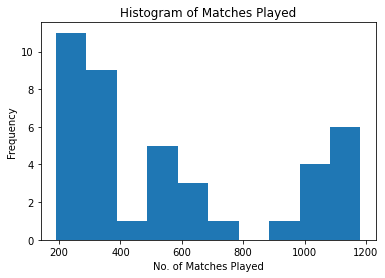

In [34]:
# Let us visualize each column

# First let us start with Matches Played column
# plot histogram
plt.hist(df['Matches Played'])

# add labels and title
plt.xlabel('No. of Matches Played')
plt.ylabel('Frequency')
plt.title('Histogram of Matches Played')

We can see from the histogram that a majority of teams have played less than 400 matches. However, there are a few teams that have played an exceptionally high number of matches, exceeding 900. 

As per the project requirements, it is worth noting that some of the more established clubs have already been owned by the competitors. Therefore, the client is interested in identifying potential clubs that may perform well in the future, even if they have less experience in the Premier League.

In [35]:
# Identify teams who have played more than 900 matches

df[df['Matches Played']>=900]['Club']

0               Arsenal
1           Aston Villa
9               Chelsea
13              Everton
18            Liverpool
19      Manchester City
20    Manchester United
22     Newcastle United
29          Southampton
33    Tottenham Hotspur
36      West Ham United
Name: Club, dtype: object

Upon analysis, we have observed that there are a total of 11 clubs who have significantly more experience in the Premier League as compared to the others. These clubs have played a higher number of matches and have established themselves as experienced players in the league.

As per the client's requirements, we are interested in identifying potential clubs that may perform well in the future, even if they have less experience in the Premier League. Therefore, we have decided to drop these 11 clubs from our analysis, as their established presence in the league may skew our results and make it difficult to identify less experienced clubs with high potential.

By removing these clubs, we can focus our analysis on the remaining clubs and potentially identify hidden gems that may have been overlooked due to their lack of experience in the league.

In [36]:
df[df['Matches Played'] < 900]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0
...,...,...,...,...,...,...,...,...,...,...
35,West Bromwich Albion,494,117,238,139,510,107,1878,0.0,0
37,Wigan Athletic,304,85,143,76,316,73,1932,0.0,0
38,Wimbledon,316,99,123,94,384,79,1868,0.0,0
39,Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0


In [40]:
df = df[df['Matches Played'] < 900].reset_index(drop=True)

In [41]:
# view data

df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0


In [42]:
# Shape of data

df.shape

(30, 10)

In [ ]:
# Now let us look at Win, Loss, Drawn, and clean sheets column

It is essential to understand that the values in all the columns represent the cumulative scores over all the matches played. 

To accurately analyze the performance of the teams, we must normalize the data by dividing the no. of wins, loss, drawn, clean sheet, goals by the number of matches played. 

This normalization will provide us with a fair idea of the winning, losing, draw, and clean sheet percentages of each team along with goals per match.

In [43]:
# Create new columns for Winning Rate, Loss Rate, Draw Rate, & Clean Sheet Rate
df['Winning Rate'] = (df['Win'] / df['Matches Played'])*100
df['Loss Rate'] = (df['Loss'] / df['Matches Played'])*100
df['Drawn Rate'] = (df['Drawn'] / df['Matches Played'])*100
df['Clean Sheet Rate'] = (df['Clean Sheets'] / df['Matches Played'])*100

In [44]:
# Create a column for average goals scored per match

df['Avg Goals Per Match']=df['Goals']/df['Matches Played']

df['Avg Goals Per Match']=df['Avg Goals Per Match'].round()

In [45]:
# View data
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,27.443609,41.729323,30.827068,24.812030,1.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,37.643678,35.919540,26.436782,30.172414,1.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,30.161943,43.927126,25.910931,21.862348,1.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,27.981651,38.990826,33.027523,26.605505,1.0


Our new columns are succesfully added in the dataframe

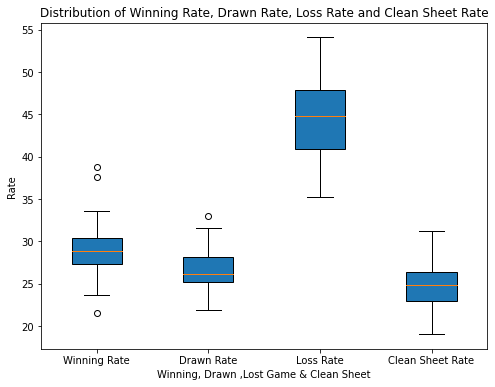

In [50]:
# Now let us visualize Winning, Loss, Drawn rate, and Clean Sheet

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
boxplot = plt.boxplot([df['Winning Rate'], df['Drawn Rate'], df['Loss Rate'], df['Clean Sheet Rate']], 
                      patch_artist=True,
                      labels=['Winning Rate', 'Drawn Rate', 'Loss Rate', 'Clean Sheet Rate'])

# Set the title and axis labels
plt.title('Distribution of Winning Rate, Drawn Rate, Loss Rate and Clean Sheet Rate')
plt.xlabel('Winning, Drawn ,Lost Game & Clean Sheet')
plt.ylabel('Rate')

# Show the plot
plt.show()

#### Winning Rate

We observe that there are a few outliers in the Winning Rate boxplot, which are located above the upper whisker. It is safe to conclude that these outlier clubs have shown exceptional winning rates compared to the other clubs. Let us identify them ahead. 

Also let us identify one outlier club with very low winning rate

#### Drawn Rate

We observe an outlier in the drawn rate boxplot, indicating that one particular club has a much higher drawn rate compared to others. This may not necessarily be a positive indication, as it suggests that the club may struggle to secure wins in their matches. Going further let us identify which club is this.

#### Loss Rate

We can see very clearly that loss rates for these clubs are high compared to winning rate. 

#### Clean Sheet Rate

We see that data for Clean Sheet rate is pretty symmetric.

In [51]:
# Winning Rate further analysis. Identify clubs with high winning rate

# Calculate the interquartile range for the "Winning Rate" column
Q1 = df['Winning Rate'].quantile(0.25)
Q3 = df['Winning Rate'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper boundaries for potential outliers <-- Expectional high winning rate compared to other teams
upper_bound = Q3 + 1.5 * IQR

# Identify the clubs with high winning rate 
highwinningrate = df[(df['Winning Rate'] > upper_bound)]
highwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,37.643678,35.919540,26.436782,30.172414,1.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,38.850174,35.191638,25.958188,31.184669,1.0


Upon analyzing the data, we have found that two teams, Leeds United and Blackburn Rovers, have exceptionally high winning rates of 39% and 38% respectively.

In [52]:
# Winning Rate further analysis. Identify club with low winning rate

# Calculate the lower boundaries for potential outliers <-- Low winning rate compared to other teams
lower_bound = Q1 - 1.5 * IQR

# Identify the clubs with high winning rate 
lowwinningrate = df[(df['Winning Rate'] < lower_bound)]
lowwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
29,Hull City,190,41,101,48,181,58,1904,0.0,0,21.578947,53.157895,25.263158,30.526316,1.0


Club is lowest winning rate of 22% is Hull City 

In [53]:
# Drawn Rate further analysis. Identify club with high drawn rate
# Calculate the interquartile range for the "Drawn Rate" column
Q1 = df['Drawn Rate'].quantile(0.25)
Q3 = df['Drawn Rate'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper boundaries for potential outliers <-- Expectional high winning rate compared to other teams
upper_bound = Q3 + 1.5 * IQR

# Identify the clubs with high winning rate 
highwinningrate = df[(df['Drawn Rate'] > upper_bound)]
highwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,27.981651,38.990826,33.027523,26.605505,1.0


Brighton & Hove Albion is expectionally high Drawn Rate of 33%

In [54]:
# Now let us explore 'Avg Goals Per Match' column

df['Avg Goals Per Match'].describe()

count    30.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Avg Goals Per Match, dtype: float64

As you can see we can't infer much from this metric. Therefore we will not use it for further analysis.

In [55]:
# Let us explore columns 'Winners' and 'Runners-up'

df['Winners'].value_counts()

0.0    28
1.0     2
Name: Winners, dtype: int64

In [56]:
df['Runners-up'].value_counts()

0    29
1     1
Name: Runners-up, dtype: Int64

We observe that out of the 30 clubs, only 2 clubs have won the Premier League, and one club has been a runner-up. Let us identify these clubs

In [57]:
df[(df['Winners']==1) | (df['Runners-up']==1)]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,37.643678,35.919540,26.436782,30.172414,1.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,33.644860,40.809969,25.545171,26.012461,1.0


Blackburn Rovers have won Premier League once and been an Runners-up once and Leicester City has won Premier League once.

In [58]:
# Lets us again analyse Matches Played Column for our reduced dataframe (30 clubs).

df['Matches Played'].describe()

count     30.000000
mean     370.600000
std      151.214987
min      190.000000
25%      266.000000
50%      310.500000
75%      494.000000
max      696.000000
Name: Matches Played, dtype: float64

Average matches played are 371.

### Section D: Final Recommendations Framework

Let's create a plan to Score each team on the pre defined metric.

* Give a score of 15 if club have a relatively high experience in the Premier League above average (371)
* Give a score of 15 if club has winning rate above Q3
* Give a score of 15 if club has lossing rate below Q1
* Give a score of 10 if club drawn rate below Q1 and losing rate is below Q1
* Give a score of 10 if club has clean sheet above Q3 and winning rate is above Q3
* Give a score of 20 if club has won premier league
* Give a score of 15 if club has been a runners-up in premier league

In [59]:
# Calculate the upper bound for the "Winning Rate" column
upper_bound_WinningRate = df['Winning Rate'].quantile(0.75)

# Calculate the lower bound for the "Loss Rate" column
lower_bound_LosingRate = df['Loss Rate'].quantile(0.25)

# Calculate the lower bound for the "Drawn Rate" column
lower_bound_DrawnRate = df['Drawn Rate'].quantile(0.25)

# Calculate the upper bound for the "Drawn Rate" column
upper_bound_CleanSheetRate = df['Clean Sheet Rate'].quantile(0.75)

In [60]:
len(df)

30

In [61]:
df['scores']=np.zeros(len(df))

In [62]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,37.643678,35.919540,26.436782,30.172414,1.0,0.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,30.161943,43.927126,25.910931,21.862348,1.0,0.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,27.981651,38.990826,33.027523,26.605505,1.0,0.0


In [63]:
df.loc[df['Matches Played'] >= 371, 'scores'] += 15
df.loc[df['Winning Rate'] >= upper_bound_WinningRate, 'scores'] += 15
df.loc[df['Loss Rate'] <= lower_bound_LosingRate, 'scores'] += 15
df.loc[(df['Drawn Rate'] <= lower_bound_DrawnRate) & (df['Loss Rate'] <= lower_bound_LosingRate), 'scores'] += 10
df.loc[(df['Clean Sheet Rate'] >= upper_bound_CleanSheetRate) & (df['Winning Rate'] >= upper_bound_WinningRate), 'scores'] += 10
df.loc[df['Winners'] == 1, 'scores'] += 20
df.loc[df['Runners-up'] == 1, 'scores'] += 15

In [64]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,37.643678,35.919540,26.436782,30.172414,1.0,90.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,30.161943,43.927126,25.910931,21.862348,1.0,15.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,27.981651,38.990826,33.027523,26.605505,1.0,15.0


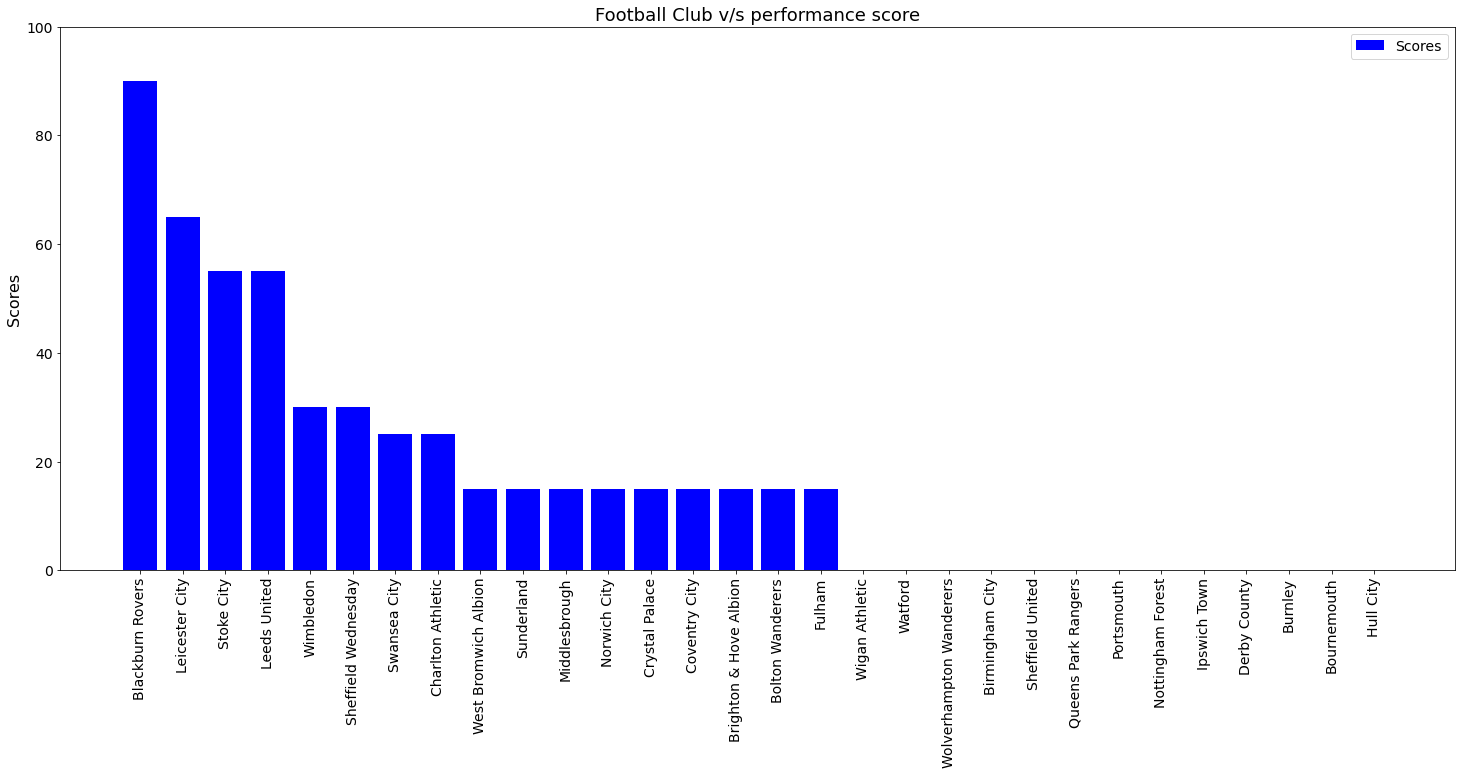

In [68]:
# sort the DataFrame by score in descending order
df_sort = df.sort_values(by='scores', ascending=False)

# create a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(df_sort['Club'], df_sort['scores'], color='blue')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

**We recommend investing in Blackburn Rovers as it has the highest score basis our analysis and next best is Leicester City.**

# Thank you!

#### If you learnt something new make sure to share it on LinkedIn and tag Aditi Gangar & Data Analyst Duo (@dataanalystduo)